In [6]:
from sklearn import datasets
import pandas as pd
import numpy as np
from typing import List, Union
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Загрузим датасет и проверим его содержимое

In [7]:
# Загружаем датасет
diabetes = datasets.load_diabetes(as_frame=True)

# Получаем DataFrame
df = diabetes.frame


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


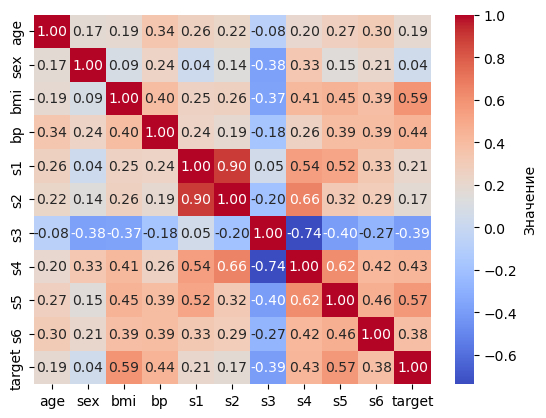

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Значение'})
plt.show()

# В качестве целевого столбца будем использова столбец target. Это непрерывные значения, поэтому воспользуемся линейно регрессией

In [10]:
import numpy as np

def linear_regression_gd(X, y, lr=0.1, lambda_decay=0.01, iterations=1000):
    """
    Линейная регрессия с градиентным спуском и адаптивным шагом обучения.

    Параметры:
    X - матрица фичей (numpy array), размерность (n_samples, n_features)
    y - вектор пердсказаний, размерность (n_samples,)
    lr - базовый шаг обучения
    lambda_decay - коэффициент адаптивного уменьшения шага
    iterations - количество итераций

    Возвращает:
    w - вектор весов (коэффициентов) модели
    b - смещение (intercept)
    """
    n_samples, n_features = X.shape
    
    # Инициализация коэффициентов
    w = np.zeros(n_features)
    b = 0
    mse_history = []  # Список для сохранения ошибки

    for k in range(1, iterations + 1):  
        
        # Предсказания
        y_predskas = np.dot(X, w) + b
        
        
        error = y_predskas - y

        # MSE (среднеквадратичная ошибка)
        mse = np.mean(error**2)
        mse_history.append(mse)
        
        # Градиенты
        dw = (2 / n_samples) * np.dot(X.T, error)  # Градиент по w
        db = (2 / n_samples) * np.sum(error)       # Градиент по b

        # Адаптивный шаг обучения
        grad_norm = np.linalg.norm(dw) + abs(db)  # Норма градиента
        alpha = lr / (1 + lambda_decay * k  )

        # Обновление параметров
        w -= alpha * dw
        b -= alpha * db

    return w, b, mse_history

In [36]:
# Разделяем признаки (X) и целевую переменную (y)

X = df.drop(columns=["target"])  # Удаляем столбец "target", оставляем только признаки
y = df["target"]  # Целевая переменная

# Разбиваем на 80% тренировочных и 20% тестовых данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
w_train, b_train, mse_train = linear_regression_gd(X_train,y_train)


In [38]:
print(f"w_train: {w_train}")
print(f"b_train: {b_train}")

w_train: [ 26.92783308  -3.30984458  92.83643883  69.0225295   24.73212576
  17.19319747 -56.5222823   60.5020008   83.25431223  57.45670268]
b_train: 153.20440779035664


In [14]:
y_predskaz_test = np.dot(X_test, w_train) + b_train

In [15]:
# Считаем ошибку на тестовой выборке

In [16]:
mse_test = np.mean((y_predskaz_test - y_test) ** 2)

In [17]:
print(f"MSE на тренировке: {mse_train[-1]}")
print(f"MSE на тесте: {mse_test}")

MSE на тренировке: 4721.5836784750345
MSE на тесте: 4112.672432378961


### Вывод: Ошибка на тесте меньше, чем на тренировке и она небольшая, что означает, что возможно, модель недообучена (можно попробовать больше итераций или другой lr), но при этом модель обобщает данные нормально.

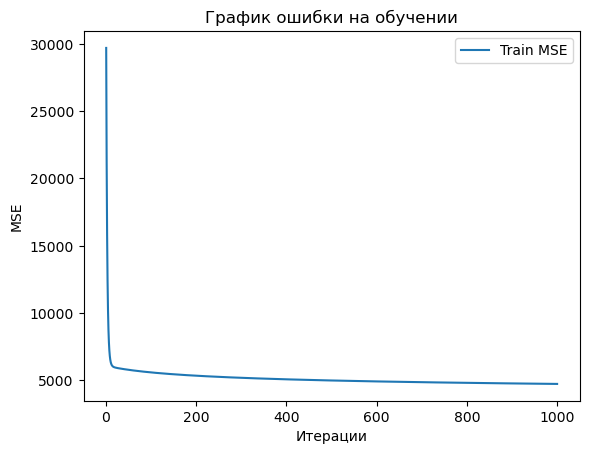

In [18]:
plt.plot(range(1, len(mse_train) + 1), mse_train, label="Train MSE")
plt.xlabel("Итерации")
plt.ylabel("MSE")
plt.title("График ошибки на обучении")
plt.legend()
plt.show()

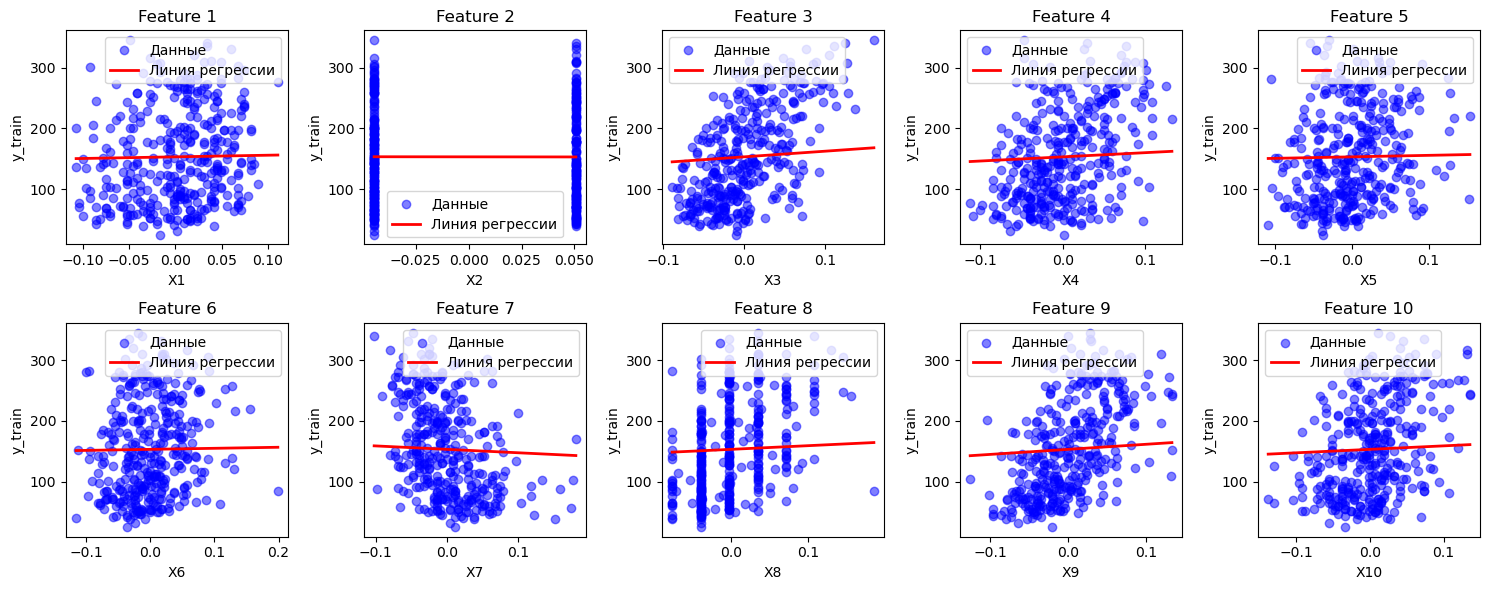

In [41]:
w_train = np.array(w_train)
b_train = float(b_train)  # Преобразуем b_train в скаляр

num_features = X_train.shape[1]

# Создаем фигуру с несколькими подграфиками
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

# Строим графики для каждого признака
for i in range(num_features):
    ax = axes[i]

    # Облако точек (X_train vs y_train)
    ax.scatter(X_train.iloc[:, i], y_train, alpha=0.5, color='blue', label="Данные")

    # Линия линейной регрессии: y = w * X + b
    x_vals = np.linspace(X_train.iloc[:, i].min(), X_train.iloc[:, i].max(), 100)
    y_vals = w_train[i] * x_vals + b_train
    ax.plot(x_vals, y_vals, color='red', linewidth=2, label="Линия регрессии")

    ax.set_title(f"Feature {i+1}")
    ax.set_xlabel(f"X{i+1}")
    ax.set_ylabel("y_train")
    ax.legend()

plt.tight_layout()
plt.show()

In [19]:
# Попробуем увеличить кол-во итераций
w_train2, b_train2, mse_train2 = linear_regression_gd(X_train,y_train, iterations=10000)

In [20]:
print(f"w_train2: {w_train}")
print(f"b_train2: {b_train}")

w_train2: [ 26.92783308  -3.30984458  92.83643883  69.0225295   24.73212576
  17.19319747 -56.5222823   60.5020008   83.25431223  57.45670268]
b_train2: 153.20440779035664


In [21]:
y_predskaz_test2 = np.dot(X_test, w_train2) + b_train2

In [22]:
mse_test2 = np.mean((y_predskaz_test2 - y_test) ** 2)

In [23]:
print(f"MSE на тренировке при 10000 итерациях: {mse_train2[-1]}")
print(f"MSE на тесте при 10000 итерациях: {mse_test2}")

MSE на тренировке при 10000 итерациях: 4086.202316280734
MSE на тесте при 10000 итерациях: 3567.351669392846


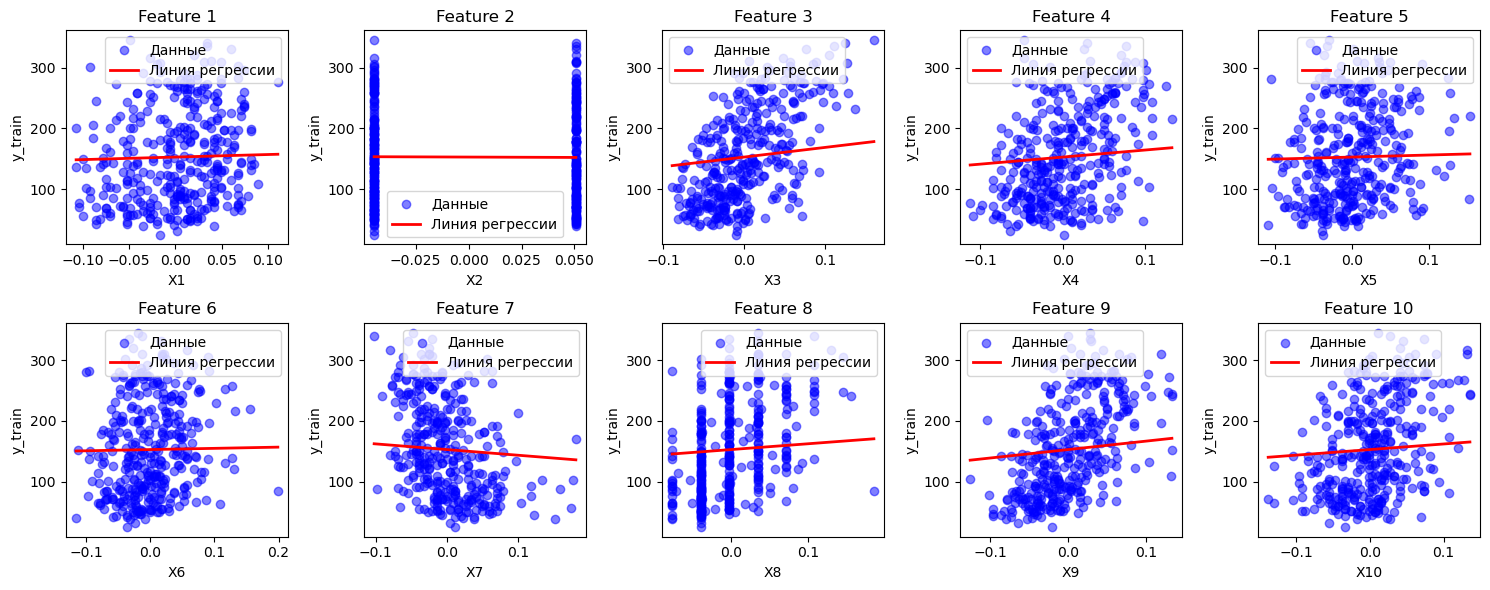

In [42]:
w_train = np.array(w_train)
b_train = float(b_train)  # Преобразуем b_train в скаляр

num_features = X_train.shape[1]

# Создаем фигуру с несколькими подграфиками
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

# Строим графики для каждого признака
for i in range(num_features):
    ax = axes[i]

    # Облако точек (X_train vs y_train)
    ax.scatter(X_train.iloc[:, i], y_train, alpha=0.5, color='blue', label="Данные")

    # Линия линейной регрессии: y = w * X + b
    x_vals = np.linspace(X_train.iloc[:, i].min(), X_train.iloc[:, i].max(), 100)
    y_vals = w_train2[i] * x_vals + b_train2
    ax.plot(x_vals, y_vals, color='red', linewidth=2, label="Линия регрессии")

    ax.set_title(f"Feature {i+1}")
    ax.set_xlabel(f"X{i+1}")
    ax.set_ylabel("y_train")
    ax.legend()

plt.tight_layout()
plt.show()

In [24]:
# Попробуем использовать нормализацию

In [25]:
scaler = StandardScaler()  # Создаем объект StandardScaler

In [26]:
X_train_scaled = scaler.fit_transform(X_train)  # Обучаем scaler и трансформируем X_train
X_test_scaled = scaler.transform(X_test)  # Трансформируем X_test (без повторного обучения)

In [27]:
w_scaled, b_scaled, mse_scaled = linear_regression_gd(X_train_scaled, y_train, iterations=10000)


In [34]:
print(f"w_scaled: {w_scaled}")
print(f"b_scaled: {b_scaled}")

w_scaled: [  1.85036772 -11.47455945  25.94854772  16.71895565 -26.70781206
  10.76391221  -0.15014936  10.70143893  28.35338527   2.47983293]
b_scaled: 153.73654390934811


In [28]:
y_predskaz_normal= np.dot(X_test_scaled, w_scaled) + b_scaled

In [29]:
mse_normal = np.mean((y_predskaz_normal - y_test) ** 2)

In [30]:
print("MSE на тренировке (после масштабирования):", mse_scaled[-1])
print(f"MSE на тесте (после масштабирования):: {mse_normal}")

MSE на тренировке (после масштабирования): 2874.283479192816
MSE на тесте (после масштабирования):: 2889.428111932833


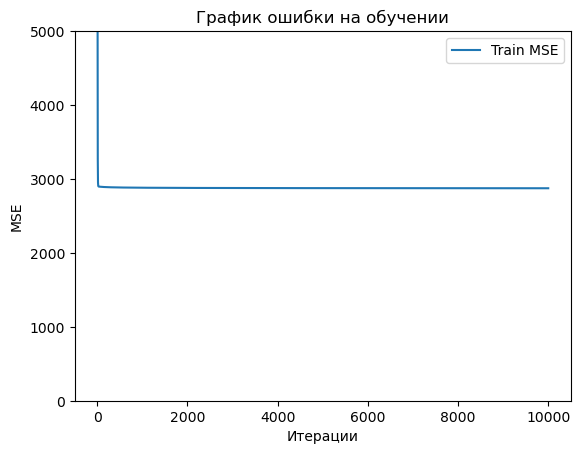

In [31]:
plt.plot(range(1, len(mse_scaled) + 1), mse_scaled, label="Train MSE")
plt.xlabel("Итерации")
plt.ylabel("MSE")
plt.ylim(0,5000)
plt.title("График ошибки на обучении")
plt.legend()
plt.show()

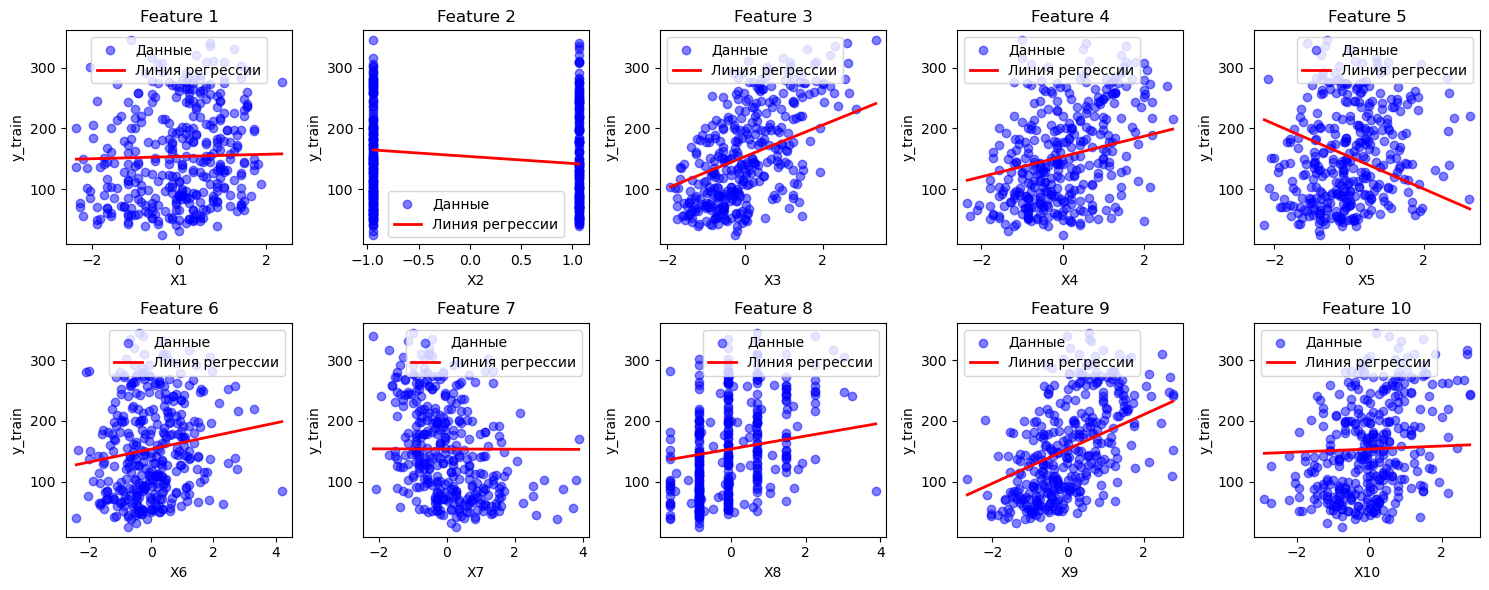

In [44]:
# Преобразуем w_scaled в numpy-массив (если он не был таким)
w_scaled = np.array(w_scaled)
b_scaled = float(b_scaled)  # Преобразуем b_scaled в скаляр

num_features = X_train_scaled.shape[1]

# Создаем фигуру с несколькими подграфиками
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

# Строим графики для каждого признака
for i in range(num_features):
    ax = axes[i]

    # Облако точек (X_train_scaled vs y_train)
    ax.scatter(X_train_scaled[:, i], y_train, alpha=0.5, color='blue', label="Данные")

    # Линия линейной регрессии: y = w * X + b
    x_vals = np.linspace(X_train_scaled[:, i].min(), X_train_scaled[:, i].max(), 100)
    y_vals = w_scaled[i] * x_vals + b_scaled
    ax.plot(x_vals, y_vals, color='red', linewidth=2, label="Линия регрессии")

    ax.set_title(f"Feature {i+1}")
    ax.set_xlabel(f"X{i+1}")
    ax.set_ylabel("y_train")
    ax.legend()

plt.tight_layout()
plt.show()

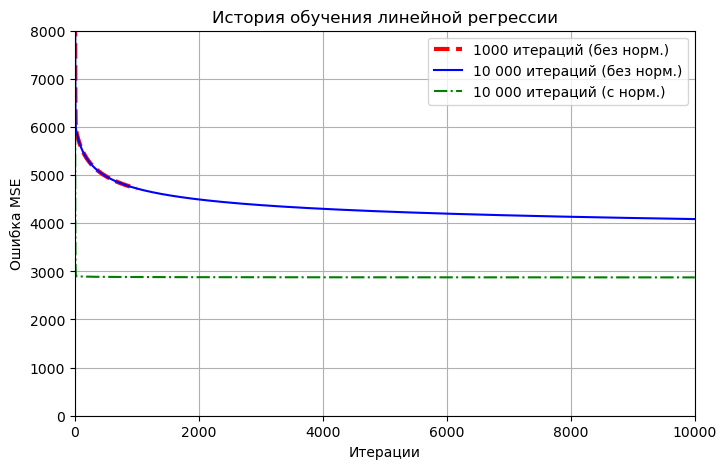

In [32]:
# Сделаем график с измененияем mse в процессе обучения

# Количество итераций (оси X)
iterations_1k = range(1, len(mse_train) + 1)  # 1000 итераций без нормализации
iterations_10k = range(1, len(mse_train2) + 1)  # 10 000 итераций без нормализации
iterations_scaled = range(1, len(mse_scaled) + 1)  # 10 000 итераций с нормализацией

# Создаем график
plt.figure(figsize=(8, 5))

# Графики
plt.plot(iterations_1k, mse_train, label="1000 итераций (без норм.)", linestyle="--", color="red", linewidth=3)  
plt.plot(iterations_10k, mse_train2, label="10 000 итераций (без норм.)", linestyle="-", color="blue")
plt.plot(iterations_scaled, mse_scaled, label="10 000 итераций (с норм.)", linestyle="-.", color="green")

# Ограничиваем ось Y
plt.ylim(0, 8000)  # Показываем только MSE до 8000

# Ограничиваем ось X одинаково для всех графиков
max_iterations = max(len(mse_train), len(mse_train2), len(mse_scaled))
plt.xlim(0, max_iterations)  # Ограничиваем ось X на максимум из всех итераций

# Оформление
plt.xlabel("Итерации")
plt.ylabel("Ошибка MSE")
plt.title("История обучения линейной регрессии")
plt.legend()
plt.grid(True)

# Показываем график
plt.show()

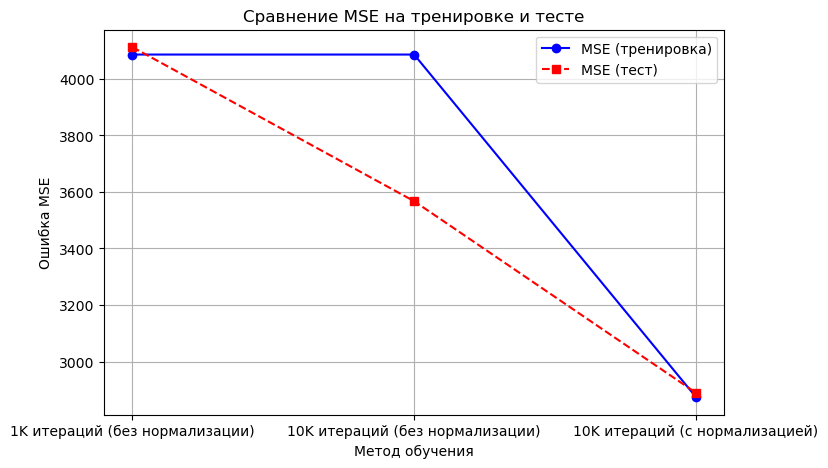

In [33]:
# Создаем список подписей
labels = ["1K итераций (без нормализации)", 
          "10K итераций (без нормализации)", 
          "10K итераций (c нормализацией)"]

# Создаем список значений MSE
mse_train_values = [mse_train2[-1], mse_train2[-1], mse_scaled[-1]]
mse_test_values = [mse_test, mse_test2, mse_normal]

# Задаем размеры графика
plt.figure(figsize=(8, 5))

# Строим графики
plt.plot(labels, mse_train_values, marker='o', linestyle='-', label="MSE (тренировка)", color="blue")
plt.plot(labels, mse_test_values, marker='s', linestyle='--', label="MSE (тест)", color="red")

# Оформление графика
plt.xlabel("Метод обучения")
plt.ylabel("Ошибка MSE")
plt.title("Сравнение MSE на тренировке и тесте")
plt.legend()
plt.grid(True)


## Выводы:
- 1. Модель стала более устойчивой
Разница между тренировочным и тестовым MSE минимальна → нет переобучения!
Раньше на тесте MSE была на 500-600 единиц меньше, а теперь почти равны.

- 2. Модель лучше обучилась
Без нормализации MSE на тесте была 4 112 (1 000 итераций) и 3 567 (10 000 итераций).
После нормализации — всего 2 886. Снижение ошибки на 30-40%!

- 3.  Нормализация помогла быстрее сходиться
Градиентный спуск лучше находил минимум → модель оптимизировалась эффективнее.